In [1]:
pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# data_dir='/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/'
# print(data_dir)
data_dir='C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/'
print(data_dir)

C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/


In [5]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 1095 files belonging to 6 classes.


In [6]:
count = 0
dirs = os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/')
for dir in dirs:
    files = list(os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'C:/Users/jerwin/Documents/butterfly_photos/pupae defects/')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/')

Ant bites Folder has 200C:/Users/jerwin/Documents/butterfly_photos/pupae defects/
Deformed body Folder has 29C:/Users/jerwin/Documents/butterfly_photos/pupae defects/
Healthy Pupae Folder has 772C:/Users/jerwin/Documents/butterfly_photos/pupae defects/
Old Pupa Folder has 47C:/Users/jerwin/Documents/butterfly_photos/pupae defects/
Overbend Folder has 20C:/Users/jerwin/Documents/butterfly_photos/pupae defects/
Stretch abdomen Folder has 27C:/Users/jerwin/Documents/butterfly_photos/pupae defects/
Images Folder has 1095C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/


In [7]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/'
img_size = 180
batch = 32

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1095 files belonging to 6 classes.
Using 876 files for training.
Found 1095 files belonging to 6 classes.
Using 219 files for validation.


In [ ]:
pupaedefects_names = train_ds.class_names
pupaedefects_names

['Ant bites',
 'Deformed body',
 'Healthy Pupae',
 'Old Pupa',
 'Overbend',
 'Stretch abdomen']

In [10]:
import matplotlib.pyplot as plt

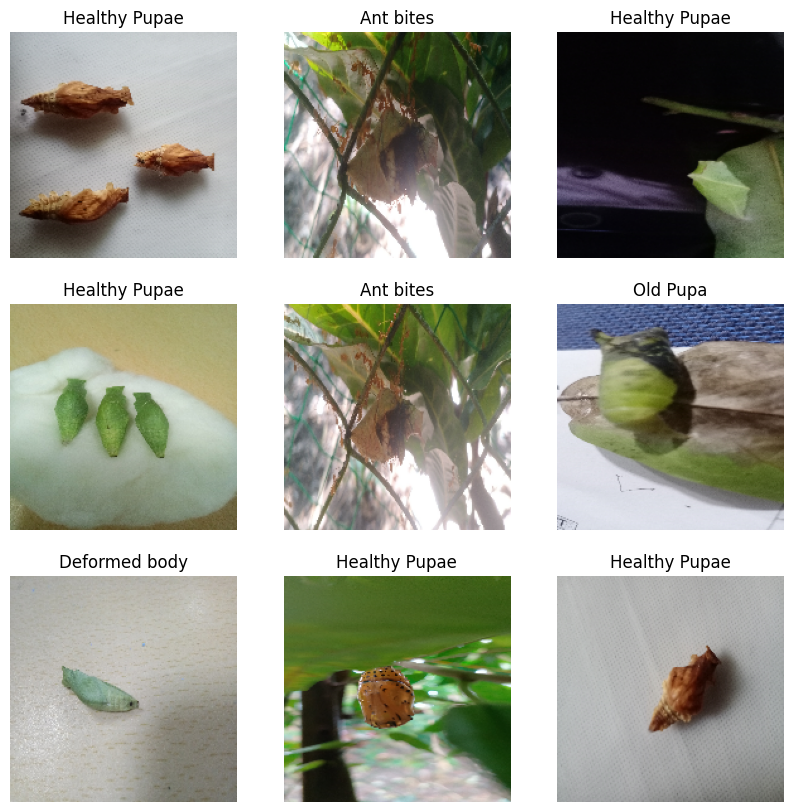

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(pupaedefects_names[labels[i]])
        plt.axis('off')

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [14]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

##Data AUgmentation

In [15]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

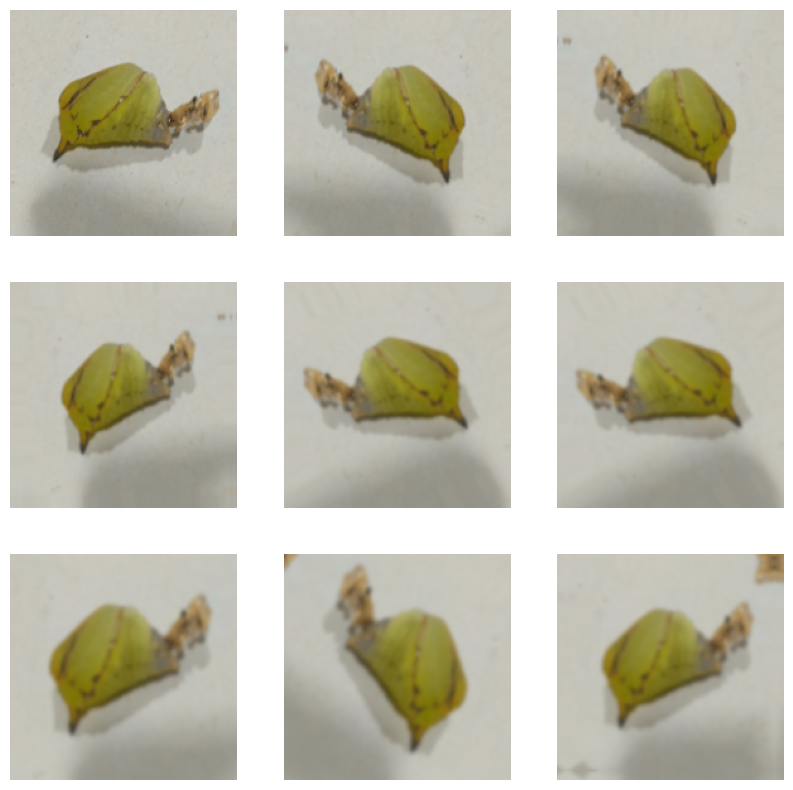

In [16]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

##Model Creation

In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [20]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


28/28 [==============================] - 16s 442ms/step - loss: 0.8875 - accuracy: 0.7397 - val_loss: 0.4029 - val_accuracy: 0.8813
Epoch 2/15
28/28 [==============================] - 6s 219ms/step - loss: 0.3760 - accuracy: 0.8767 - val_loss: 0.2370 - val_accuracy: 0.8995
Epoch 3/15
28/28 [==============================] - 6s 199ms/step - loss: 0.2611 - accuracy: 0.9030 - val_loss: 0.2388 - val_accuracy: 0.9269
Epoch 4/15
28/28 [==============================] - 6s 229ms/step - loss: 0.2532 - accuracy: 0.9144 - val_loss: 0.3658 - val_accuracy: 0.9132
Epoch 5/15
28/28 [==============================] - 6s 200ms/step - loss: 0.2546 - accuracy: 0.9041 - val_loss: 0.3819 - val_accuracy: 0.8904
Epoch 6/15
28/28 [==============================] - 5s 197ms/step - loss: 0.2411 - accuracy: 0.9224 - val_loss: 0.2376 - val_accuracy: 0.9315
Epoch 7/15
28/28 [==============================] - 6s 201ms/step - loss: 0.2004 - accuracy: 0.9361 - val_loss: 0.1851 - val_accuracy: 0.9361
Epo

In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + pupaedefects_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [22]:
classify_images('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/Deformed body/deformedBody51.jpg')

1/1 [==============================] - 0s 307ms/step


'The Image belongs to Healthy Pupae with a score of 65.0164544582367'

In [ ]:
model.save('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Pupae_Defects.keras')

In [ ]:
model.save('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Pupae_Defects.h5')

c:\Users\jerwin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Pupae_Defects.h5')


In [26]:
# Check the loaded model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/PrettyLep/json/model_Pupae_Defects.json", "w") as json_file:
    json_file.write(model_json)


In [28]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Pupae_Defects.h5')

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/PrettyLep/json/Architecture_Pupae_Defects.json", "w") as json_file:
    json_file.write(model_json)


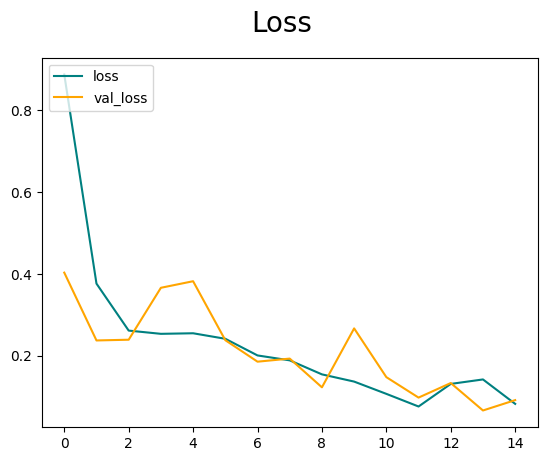

In [31]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

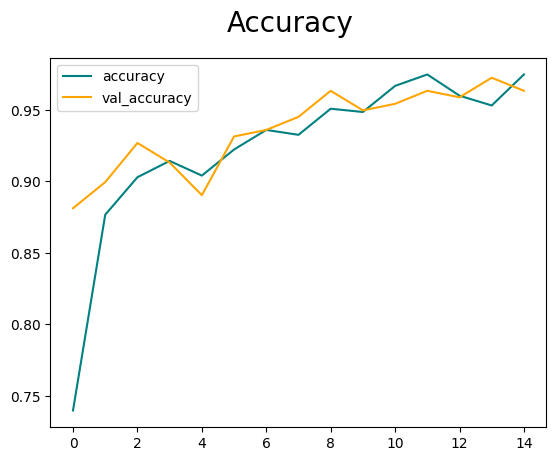

In [32]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

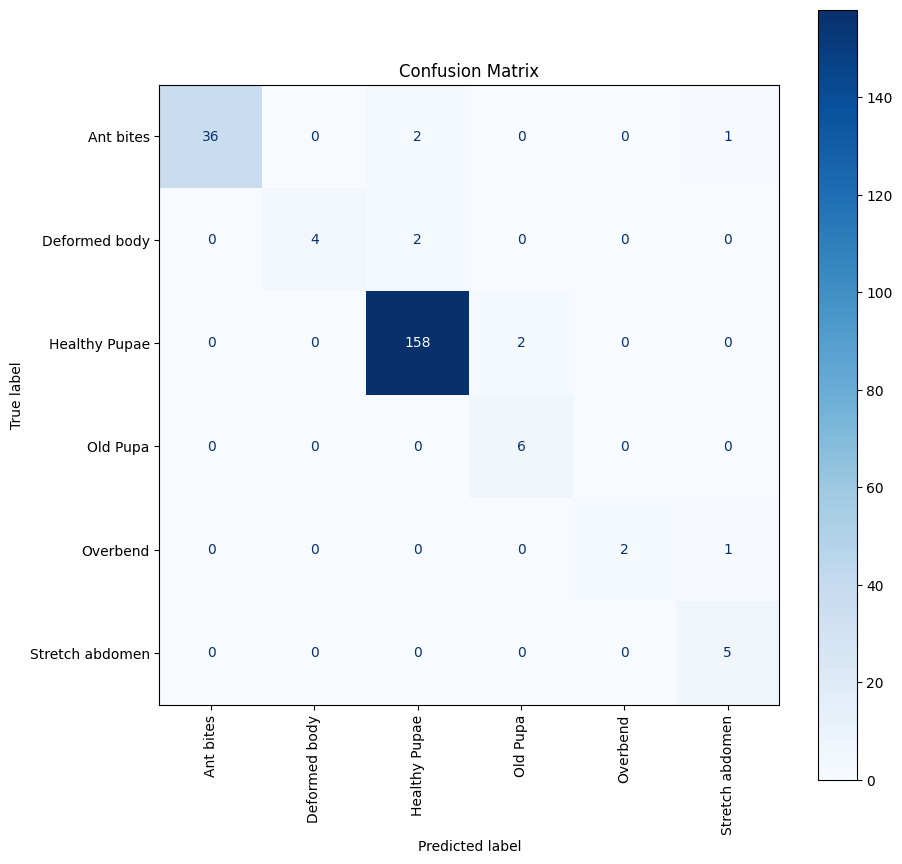

F1 Score (macro): 0.8720
F1 Score (weighted): 0.9633


In [ ]:

# ...existing code...

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Evaluate model and plot confusion matrix + F1 score
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    img_array = tf.expand_dims(images, 0)  # Add batch dimension
    preds = model.predict(img_array, verbose=0)
    pred_label = np.argmax(preds, axis=1)[0]
    y_true.append(labels.numpy())
    y_pred.append(pred_label)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pupaedefects_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

# F1 Score (macro and weighted)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")
# ...existing code...